In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [4]:
df.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [6]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
df.groupby('title')['rating'].mean().head() #gives the mean of the ratings for each movie

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head() #highest rated movies
#as df.groupby('title')['rating'].mean() is a series we use sort_values()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].mean().sort_values().head() #lowest rated movies

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Butterfly Kiss (1995)                           1.0
Daens (1992)                                    1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Name: rating, dtype: float64

In [11]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head() #movies with high number of ratings

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [12]:
df.groupby('title')['rating'].count().sort_values(ascending=True).head() #movies with low number of ratings

title
Á köldum klaka (Cold Fever) (1994)            1
Mille bolle blu (1993)                        1
Mat' i syn (1997)                             1
Marlene Dietrich: Shadow and Light (1996)     1
Man from Down Under, The (1943)               1
Name: rating, dtype: int64

In [14]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [16]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()
#df.groupby('title')['rating'].count() gives the number of ratings for each movie
#we add this as 'num_of_ratings' column to the ratings dataframe

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

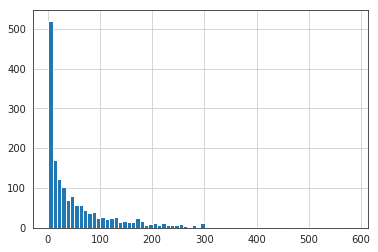

In [17]:
ratings['num of ratings'].hist(bins=70) #frequency of every 'number of ratings'

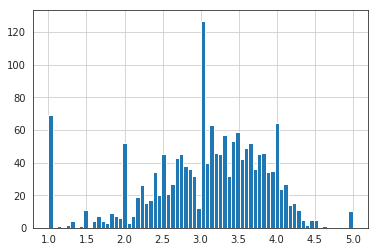

In [18]:
ratings['rating'].hist(bins=70) #frequency of every 'rating'

In [19]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5) 
#joins previous 2 plots
#the more denser the dots more the frequency

In [20]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
0        ...                 NaN                       NaN   
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
0                        NaN                        NaN                NaN   
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
0                         NaN                                    NaN   
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
0                            NaN      NaN                                 NaN  
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                    

In [21]:
ratings.sort_values('num of ratings',ascending=False).head()

rating  num of ratings
title                                              
Star Wars (1977)           4.359589             584
Contact (1997)             3.803536             509
Fargo (1996)               4.155512             508
Return of the Jedi (1983)  4.007890             507
Liar Liar (1997)           3.156701             485

In [22]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [23]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/home/soumya/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/soumya/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

Correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [25]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

Correlation
title                                                          
Commandments (1997)                                         1.0
Cosi (1996)                                                 1.0
No Escape (1994)                                            1.0
Stripes (1981)                                              1.0
Man of the Year (1995)                                      1.0
Hollow Reed (1996)                                          1.0
Beans of Egypt, Maine, The (1994)                           1.0
Good Man in Africa, A (1994)                                1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0

In [26]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

Correlation  num of ratings
title                                                 
'Til There Was You (1997)     0.872872               9
1-900 (1994)                 -0.645497               5
101 Dalmatians (1996)         0.211132             109
12 Angry Men (1957)           0.184289             125
187 (1997)                    0.027398              41

In [27]:
corr_starwars[corr_starwars['num of ratings']>50].sort_values('Correlation',ascending=False)

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Giant (1956)                                           0.488093   
Life Less Ordinary, A (1997)                           0.411638   
Austin Powers: International Man of Mystery (1997)     0.377433   
Sting, The (1973)                                      0.367538   
Indiana Jones and the Last Crusade (1989)              0.350107   
Pinocchio (1940)                                       0.347868   
Things to Do in Denver when You're Dead (1995)         0.337714   
Shadowlands (1993)                                     0.332941   
Frighteners, The (1996)                                0.332729   
L.A. Confidential (1997)                               0.319065   
Wag the Dog (1997)                                     0.318645   
Sabrina (1954)                                         0.318292   
Dumbo (1941)                                           0.317656   
Bridge on the River Kwai, The (1957)                   0.316580   
Philadelphia Story, The (1940)                         0.314272   
Miracle on 34th Street (1994)                          0.310921   
Last Man Standing (1996)                               0.305275   
E.T. the Extra-Terrestrial (1982)                      0.303619   
Delicatessen (1991)                                    0.302606   
Hercules (1997)                                        0.302528   
Mystery Science Theater 3000: The Movie (1996)         0.301809   
Cinderella (1950)                                      0.299163   
Body Snatchers (1993)                                  0.295781   
Roman Holiday (1953)                                   0.294340   
Jackal, The (1997)                                     0.291872   
20,000 Leagues Under the Sea (1954)                    0.289768   
...                                                         ...   
Kiss the Girls (1997)                                 -0.122186   
Local Hero (1983)                                     -0.124173   
Edge, The (1997)                                      -0.127167   
Last Action Hero (1993)                               -0.128410   
As Good As It Gets (1997)                             -0.130466   
Homeward Bound: The Incredible Journey (1993)         -0.135341   
Red Rock West (1992)                                  -0.137075   
White Squall (1996)                                   -0.144673   
Looking for Richard (1996)                            -0.147107   
Crash (1996)                                          -0.148507   
Fan, The (1996)                                       -0.151833   
Dirty Dancing (1987)                                  -0.156920   
Three Colors: Blue (1993)                             -0.160691   
Preacher's Wife, The (1996)                           -0.162548   
G.I. Jane (1997)                                      -0.176734   
Home for the Holidays (1995)                          -0.181054   
Anastasia (1997)                                      -0.188198   
Evil Dead II (1987)                                   -0.190719   
First Wives Club, The (1996)                          -0.194496   
U Turn (1997)                                         -0.194595   
Rosencrantz and Guildenstern Are Dead (1990)          -0.197935   
Apostle, The (1997)                                   -0.205777   
Midnight in the Garden of Good and Evil (1997)        -0.207440   
Jack (1996)                                           -0.217553   
McHale's Navy (1997)                                  -0.239763   
Excess Baggage (1997)                                 -0.239936   
Nosferatu (Nosferatu, eine Symphonie des Grauen...    -0.241561   
Walk in the Clouds, A (1995)    

In [33]:
#the above steps are combined in the function below

def find_similar(movie):
    user_ratings = moviemat[movie]
    similar = moviemat.corrwith(user_ratings)
    corr_movie = pd.DataFrame(similar,columns=['Correlation'])
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    print(corr_movie[corr_movie['num of ratings']>50].sort_values('Correlation',ascending=False).head())

In [36]:
find_similar('101 Dalmatians (1996)')

/home/soumya/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/soumya/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                     Correlation  num of ratings
title                                                           
101 Dalmatians (1996)                   1.000000             109
Apostle, The (1997)                     1.000000              55
Wings of the Dove, The (1997)           0.880705              75
Man Who Knew Too Little, The (1997)     0.866025              52
McHale's Navy (1997)                    0.739510              69
